In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
%matplotlib inline
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size': 18
})

SAVE_FIG = False

def save_fig(name, tight_layout = True):
    if SAVE_FIG:
        if not os.path.isdir("plots"):
            os.mkdir("plots")
        print(f"Saving figure {name} ...")
        if tight_layout:
            plt.tight_layout()
        plt.savefig(f"plots/{name}.pdf", backend="pgf")

In [2]:
tf.random.set_seed(42)

In [3]:
X = 6 * tf.random.uniform((100, 1)) - 3
y = 5 + 3*X + tf.random.normal((100, 1), stddev=3)

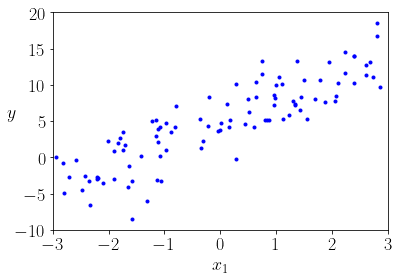

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, -10, 20])
plt.show()

In [5]:
def prepend_ones(v: tf.Tensor):
    paddings = tf.constant([[0, 0], [1, 0]])
    return tf.pad(v, paddings, constant_values=1)

X_pad = prepend_ones(X)

## Normalgleichungssystem
\begin{equation*}
\vec{\Theta} = (X^TX)^{-1} \cdot X^T \cdot X
\end{equation*}

In [6]:
X_pad_t = tf.transpose(X_pad)
theta_best = tf.linalg.pinv(X_pad_t @ X_pad) @ X_pad_t @ y
theta_best

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[4.8714533],
       [2.9824047]], dtype=float32)>

In [7]:
X_new = tf.constant([[-4.], [4.]])
X_new_pad = prepend_ones(X_new)
y_predict = X_new_pad @ theta_best
y_predict

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-7.0581656],
       [16.801071 ]], dtype=float32)>

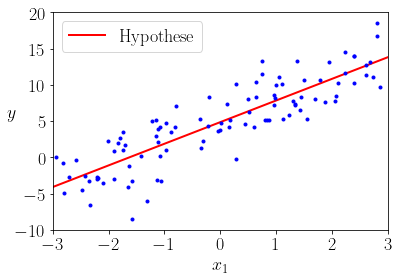

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Hypothese")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, -10, 20])
save_fig("data_points_line")
plt.show()

In [9]:
def MSE(X, y, th0, th1):
    m = y.shape[0]
    theta = tf.constant([[th0], [th1]], dtype=tf.float32)

    pred = X @ theta
    error = pred - y
    return 1/m * tf.reduce_sum(error ** 2)

In [10]:
MSE(X_pad, y, 5, 3)

<tf.Tensor: shape=(), dtype=float32, numpy=7.9696393>